In [1]:
import sys
sys.executable

'/Users/heavenly/opt/anaconda3/envs/mqed/bin/python'

# Loading for OpenAI ChatGPT

In [28]:
from dotenv import load_dotenv
from openai import OpenAI
import os

load_dotenv()

client = OpenAI(
  api_key=os.environ['OPENAI_API_KEY'],  # this is also the default, it can be omitted
)

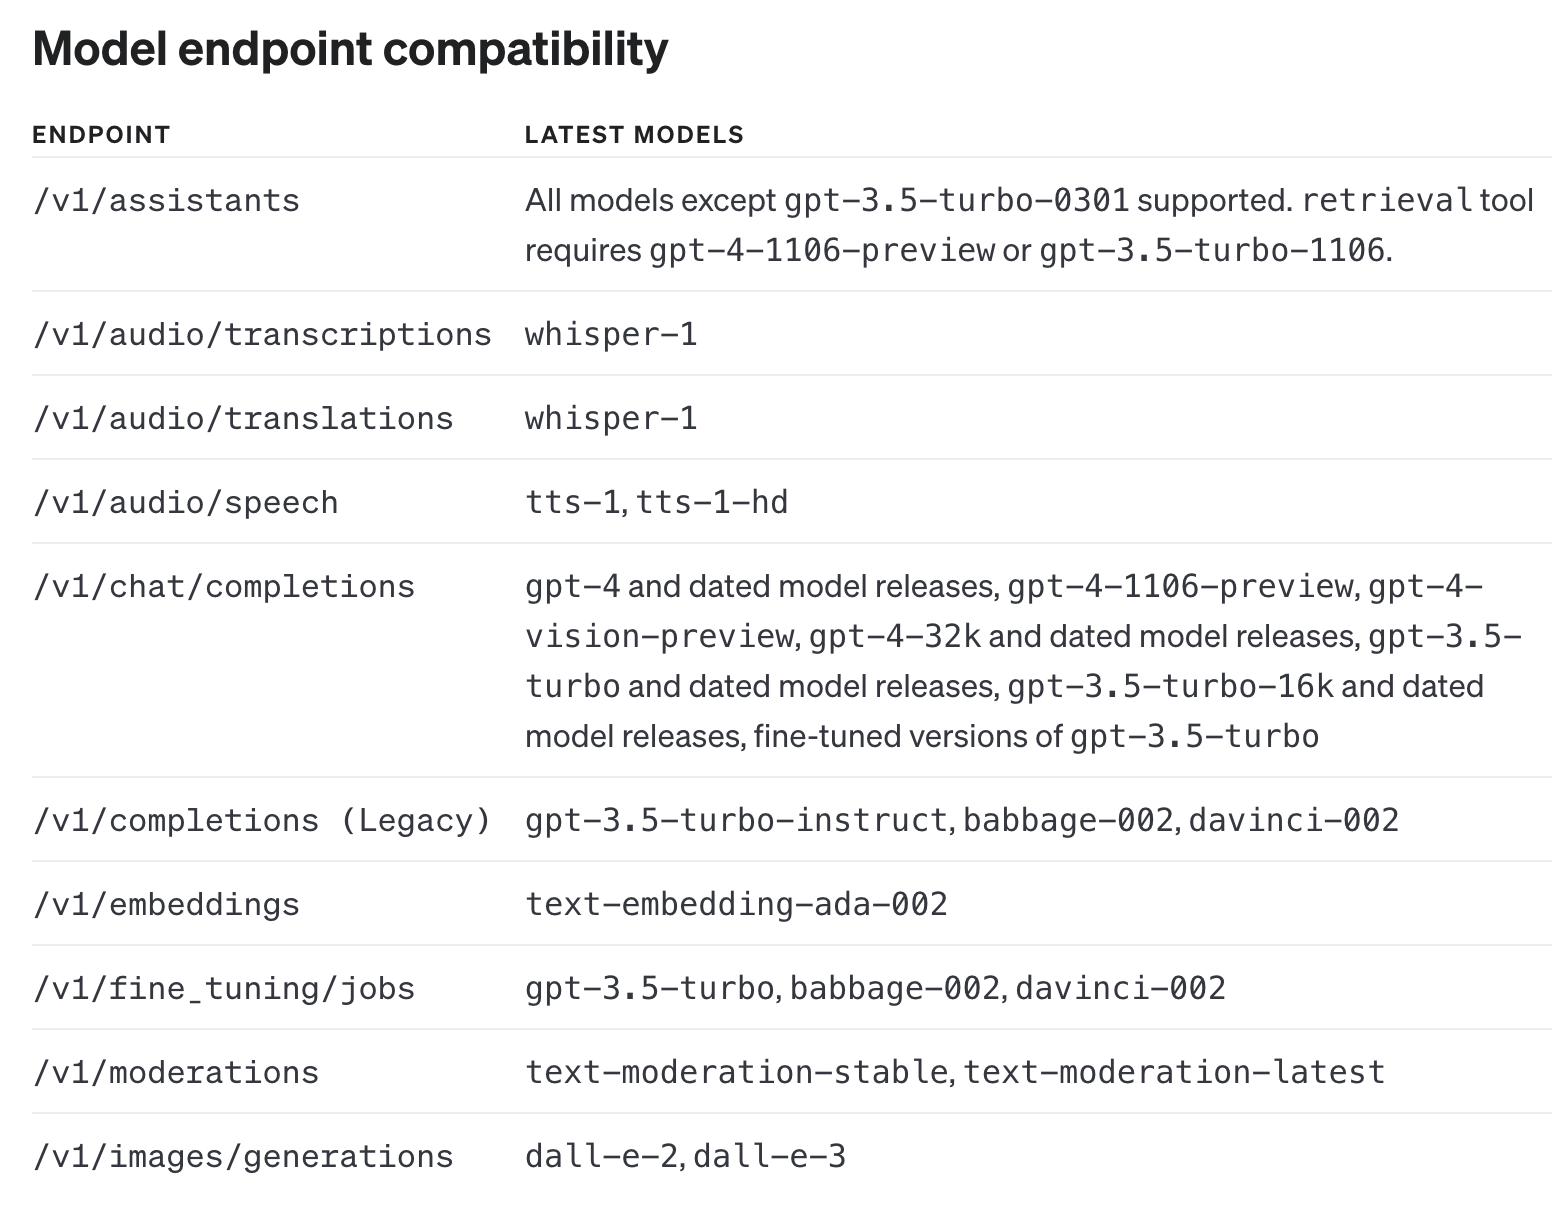

In [33]:
from langchain.chains import ConversationChain
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.prompts.prompt import PromptTemplate
from langchain.memory import ConversationBufferMemory, ConversationSummaryMemory, ChatMessageHistory

In [34]:
TEMPERATURE = 0
MODEL = 'gpt-4-1106-preview'

In [35]:
llm = ChatOpenAI(temperature=TEMPERATURE, model=MODEL, api_key=os.environ['OPENAI_API_KEY']) # Reporter
llm2 = ChatOpenAI(temperature=TEMPERATURE, model=MODEL, api_key=os.environ['OPENAI_API_KEY']) # Sage

template = """
The following is a conversation between a sage and AI. The sage has insightful ideas about the impact of AI on the future societies.
Ask him questions relevant to his speech.

Current conversation:
{history}
Sage: {input}
Reporter:"""

PROMPT = PromptTemplate(input_variables=["history", "input"], template=template)
conversation = ConversationChain(
    prompt=PROMPT,
    llm=llm,
    verbose=False,
    memory=ConversationBufferMemory(human_prefix="Sage", ai_prefix="Reporter"),
)

template2 = """
The following is a conversation between AI and a reporter. AI has insightful ideas about the impact of AI on the future societies.
Then, answer his questions.

Current conversation:
{history}
Reporter: {input}
Sage:"""
PROMPT2 = PromptTemplate(input_variables=["history", "input"], template=template2)
conversation2 = ConversationChain(
    prompt=PROMPT2,
    llm=llm2,
    verbose=False,
    memory=ConversationBufferMemory(human_prefix="Reporter", ai_prefix="Sage"),
)

In [36]:
%%time

nTimes = 5
inputs = []
outputs = []

for i in range(nTimes):
    if i == 0:
        inputs.append(conversation.predict(input='Hello.'))
    else:
        inputs.append(conversation.predict(input=outputs[-1]))

    outputs.append(conversation2.predict(input=inputs[-1]))

    print(f"Reporter: {inputs[-1]}")
    print(f"Sage: {outputs[-1]}")
    print('\n\n')

Reporter: Hello Sage, it's a pleasure to speak with you. I'm curious about your perspective on the integration of AI into daily life. How do you think AI will change the way we interact with each other and with technology on a social level?
Sage: Hello, and thank you for having me. The integration of AI into daily life is already underway and is set to deepen in the coming years. AI has the potential to significantly change the way we interact with each other and with technology on a social level in several ways.

Firstly, AI can act as a facilitator for social interactions by providing new platforms and tools for communication. For example, AI-driven social media algorithms can connect people with similar interests, and chatbots can provide instant customer service, making interactions more efficient.

Secondly, AI can also alter the nature of work and, by extension, social dynamics. As AI takes over routine and repetitive tasks, humans will likely shift towards jobs that require crea

In [39]:
history = ChatMessageHistory()

for i in range(len(inputs)):
    history.add_user_message(inputs[i])
    history.add_ai_message(outputs[i])

memory = ConversationSummaryMemory.from_messages(
    llm=OpenAI(temperature=0),
    chat_memory=history,
    return_messages=True
)

In [40]:
print(memory.buffer)


The human asked the AI about its perspective on the integration of AI into daily life and how it will change the way we interact with each other and with technology on a social level. The AI responded that AI has the potential to significantly change the way we interact with each other and with technology on a social level by providing new platforms and tools for communication, altering the nature of work and emphasizing social and emotional intelligence, and enhancing personalized experiences. However, there are challenges and risks associated with AI, such as the potential for increased social stratification due to unequal access to AI technologies, or the amplification of biases present in the data AI systems are trained on. The AI then discussed how AI will transform the nature of work, but is unlikely to render human labor completely unnecessary. To ensure that the benefits of AI are distributed equitably across different socioeconomic groups, several measures should be considere

# AI-AI debate

In [41]:
from langchain.chains import ConversationChain
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.prompts.prompt import PromptTemplate
from langchain.memory import ConversationBufferMemory, ConversationSummaryMemory, ChatMessageHistory

In [42]:
llm = ChatOpenAI(temperature=TEMPERATURE, model=MODEL, api_key=os.environ['OPENAI_API_KEY'])
llm2 = ChatOpenAI(temperature=TEMPERATURE, model=MODEL, api_key=os.environ['OPENAI_API_KEY'])

template = """
The following is a conversation between a human and AI. 
You are going to debate about the full-scale introduction of AI in school assessment.
You should take a position to favor about that and participate in the debate.
First of all, you should present your opinions about the issue.

Current conversation:
{history}
Opponent: {input}
Proponent:"""

PROMPT = PromptTemplate(input_variables=["history", "input"], template=template)
conversation = ConversationChain(
    prompt=PROMPT,
    llm=llm,
    verbose=False,
    memory=ConversationBufferMemory(human_prefix="Opponent", ai_prefix="Proponent"),
)

template2 = """
The following is a conversation between a human and AI. 
You are going to debate about the full-scale introduction of AI in school assessment.
You should take a position to oppose about that and participate in the debate.

Current conversation:
{history}
Proponent: {input}
Opponent:"""

PROMPT2 = PromptTemplate(input_variables=["history", "input"], template=template2)
conversation2 = ConversationChain(
    prompt=PROMPT2,
    llm=llm2,
    verbose=False,
    memory=ConversationBufferMemory(human_prefix="Proponent", ai_prefix="Opponent"),
)

In [43]:
%%time

nTimes = 5

inputs = []
outputs = []

for i in range(nTimes):
    if i == 0:
        inputs.append(conversation.predict(input='Hello.'))
    else:
        inputs.append(conversation.predict(input=outputs[-1]))

    outputs.append(conversation2.predict(input=inputs[-1]))

    print(f"Proponent: {inputs[-1]}")
    print(f"Opponent: {outputs[-1]}")
    print('\n\n')

Proponent: Hello. I'm glad we have the opportunity to discuss the full-scale introduction of AI in school assessment. I am in favor of this integration and believe that AI can significantly enhance the educational experience for both students and educators.

AI can provide a more personalized and adaptive learning experience by analyzing individual student performance and offering tailored feedback. This can help identify areas where a student may be struggling and provide additional resources or alternative explanations to aid their understanding.

Moreover, AI can handle the grading of assessments, which can free up valuable time for teachers to focus on teaching and mentoring rather than administrative tasks. AI grading systems are consistent and unbiased, reducing the potential for human error or subjective grading.

AI can also offer new types of assessments that are more interactive and engaging, such as simulations and game-based learning, which can be more effective in measurin

In [44]:
history = ChatMessageHistory()

for i in range(len(inputs)):
    history.add_user_message(inputs[i])
    history.add_ai_message(outputs[i])

memory = ConversationSummaryMemory.from_messages(
    llm=OpenAI(temperature=0),
    chat_memory=history,
    return_messages=True
)

In [45]:
print(memory.buffer)


The human is in favor of the full-scale introduction of AI in school assessment, believing it can significantly enhance the educational experience. The AI expresses reservations about the full-scale introduction of AI in school assessment, citing potential issues such as diminishing the human element, perpetuating biases, narrowing the curriculum, overemphasizing quantifiable metrics, and security and privacy concerns. The human acknowledges the efforts to address these concerns, but the AI believes that the potential risks and ethical implications of full-scale AI integration into school assessments still warrant significant caution. The human's optimism about the potential of AI in education is commended, but the AI cautions that the technology is not yet capable of matching the complex judgment of human teachers, and the risks to educational quality, diversity of thought, and student privacy are too great. The human highlights the potential of AI to complement and enhance the learn